In [3]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #(n_neighbors=5,
from sklearn.decomposition import PCA,KernelPCA #(n_components=None
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.linalg import pinv, solve
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.preprocessing import LabelEncoder

In [4]:
#read file data
df = pd.read_csv('Thyloid.csv')
print(df.shape)

(574, 1882)


In [5]:
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
0,14316.183948,14351.995128,14412.983601,12203.480690,6594.417741,798.167093,2007.302666,7279.990730,7366.938399,861.970419,...,2.032949,0.000000,0.312761,14.699786,0,12.354075,82.881771,1937.869635,36571.972419,3
1,18042.893723,17822.176422,18024.997726,8962.166370,3304.048522,3772.327121,4741.693647,5520.915201,5780.407164,472.006932,...,9.693665,0.000000,0.000000,20.878664,0,4.473999,15.658998,2320.514331,113675.375555,1
2,23542.996389,23403.850012,23393.390262,10325.675423,6358.260398,1129.019119,4283.426272,16578.070468,16638.927197,1227.594343,...,4.120508,0.316962,1.267849,8.557978,0,15.214182,97.307375,1719.836536,36302.307072,1
3,35319.514700,35344.502424,35235.536971,7294.517488,5175.621787,950.956848,6652.902332,35001.632900,35642.299155,2407.045273,...,1.265201,0.158150,0.474450,16.605766,0,11.544961,78.126174,1490.407007,28383.207301,1
4,10786.292006,10704.600259,10960.408721,4716.654860,3542.559611,3325.510007,2781.097126,8194.218848,8312.284292,2685.094417,...,2.385160,0.000000,0.000000,39.355148,0,7.155481,103.158191,680.963319,125770.108692,4


In [6]:
# Split data & label

data = df.iloc [:,:-1].to_numpy()
label = df.iloc [:,-1].to_numpy()

In [7]:
# Spilt  data
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(459, 1881)
(115, 1881)


Label Distribution: {0: 11, 1: 325, 2: 59, 3: 126, 4: 53}


/var/folders/nn/8mj616453yg4q70_np1n86c80000gn/T/ipykernel_3318/3615901971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


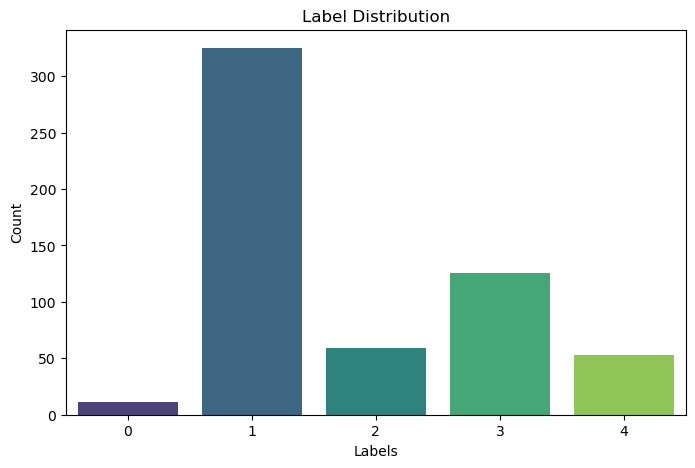

In [8]:
# Convert categorical labels to numerical (if necessary)
if label.dtype == 'O':  # Object type (categorical labels)
    label_encoder = LabelEncoder()
    label = label_encoder.fit_transform(label)

# Analyze Label Distribution
unique, counts = np.unique(label, return_counts=True)
label_dist = dict(zip(unique, counts))

print("Label Distribution:", label_dist)

# Plot Label Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [10]:
def my_pca(Data,k):
    mean1 = np.mean(Data)
    D_centered=Data-mean1
    cov_matrix=np.cov(D_centered,rowvar=False)
    eig_values,eig_vectors=np.linalg.eig(cov_matrix)
    idx=np.argsort(eig_values)[::-1]
    eig_values=eig_values[idx]
    eig_vectors=eig_vectors[:,idx]
    red_eig_vectors=eig_vectors[:,:k]
    projected_data=np.dot(D_centered,red_eig_vectors)
    return projected_data,mean1,red_eig_vectors

In [29]:
# PCA on training data
X_train_reduced,mean1,red_eig_vectors=my_pca(X_train,10)
print(X_train_reduced.shape)

(459, 10)


In [31]:
# PCA on Testing Data
Test_centered=X_test-mean1
X_test_reduced=np.dot(Test_centered,red_eig_vectors)
print(X_test_reduced.shape)


(115, 10)


In [33]:
# PCA via SkLearn
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_reduced_sklearn=pca.transform(X_train)
X_test_reduced_sklearn=pca.transform(X_test)
print(X_train_reduced_sklearn.shape)
print(X_test_reduced_sklearn.shape)

(459, 10)
(115, 10)


In [35]:
# Part 2

In [37]:
def rbf_kernel(x,y,gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x-y) **2)

In [39]:
def poly_kernel(x,y,degree,coef0):
    return(coef0 + np.dot(x,y))**degree

In [41]:
def linear_kernel(x,y):
    return np.dot(x,y)

In [43]:
def center_kernel_matrix(kernel_mx):
    n = kernel_mx.shape[0]
    row_mean = np.mean(kernel_mx, axis=1)
    col_mean = np.mean(kernel_mx, axis=0)
    total_mean = np.mean(kernel_mx)
    centered_kernel_mx = kernel_mx - row_mean[:, np.newaxis] - col_mean + total_mean
    return centered_kernel_mx

In [45]:
def kernel_matrix(data,kernel_type,kernel_par):
    n=data.shape[0]
    kernel_mx=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if kernel_type=='linear':
                kernel_mx[i,j]=linear_kernel(data[i],data[j])
            elif kernel_type=='poly':
                kernel_mx[i,j]=poly_kernel(data[i],data[j],**kernel_par)
            else:
                kernel_mx[i,j]=rbf_kernel(data[i],data[j])
    return kernel_mx

In [47]:
d1 = pd.read_csv('Thyloid.csv')
d1 = d1.fillna(d1.mean())
d1 = d1.to_numpy()
print(d1.shape)

(574, 1882)


In [48]:
# KPCA from scratch
def kernel_pca(data,kernel_type,kernel_par,n_components):
    K=kernel_matrix(data,kernel_type,kernel_par)
    K_centered= center_kernel_matrix(K)
    x_pca,mean1,red_eig_vectors = my_pca(K_centered, n_components)
    return x_pca,mean1,red_eig_vectors

(574, 2)


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


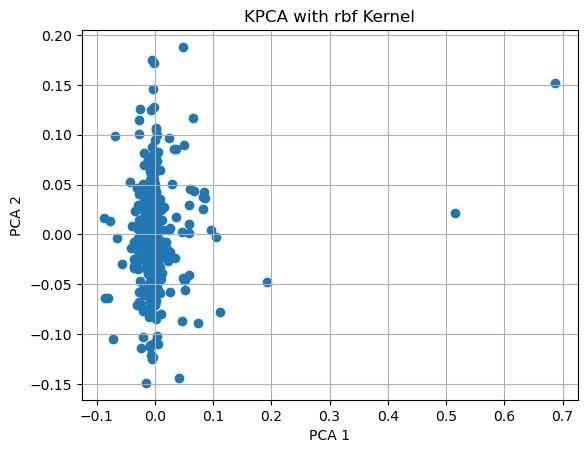

In [51]:
# Set kernel parameters and number of components for Kernel PCA
kernel_type = 'rbf'  
kernel_par = {'degree': 3, 'coef0': 1}  
gamma = 1.0  
n_components = 2  # Reduce to 2 components 

# Perform Kernel PCA
X_pca, mean1, red_eig_vectors = kernel_pca(data, kernel_type, kernel_par if kernel_type == 'poly' else gamma, n_components)

# Check the  data
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('KPCA with rbf Kernel')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()


(574, 2)


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


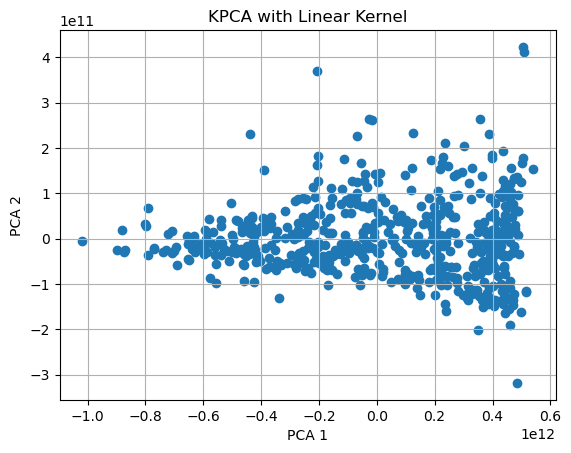

In [52]:
# Set kernel parameters and number of components for Kernel PCA
kernel_type = 'linear'
kernel_par = {'degree': 3, 'coef0': 1}  
gamma = 1.0  
n_components = 2  # Reduce to 2 components 

# Perform Kernel PCA
X_pca, mean1, red_eig_vectors = kernel_pca(data, kernel_type, kernel_par if kernel_type == 'poly' else gamma, n_components)

# Check the  data
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('KPCA with Linear Kernel')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()



(574, 2)


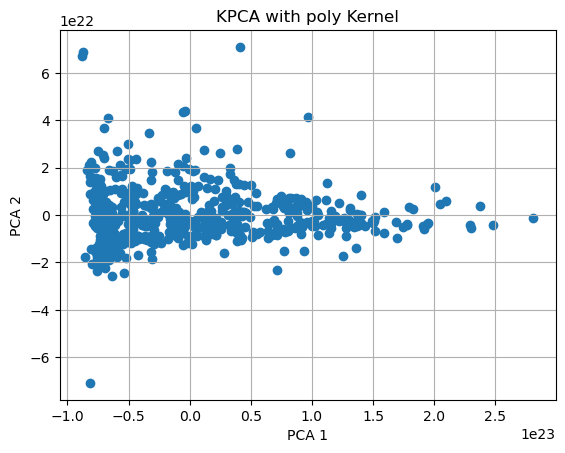

In [53]:
# Set kernel parameters and number of components for Kernel PCA
kernel_type = 'poly'  
kernel_par = {'degree': 2, 'coef0': 1}  
gamma = 1.0  
n_components = 2  

# Perform Kernel PCA

X_pca, mean1, red_eig_vectors = kernel_pca(data, kernel_type, kernel_par, n_components)
print(X_pca.shape)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('KPCA with poly Kernel')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()

(574, 2)


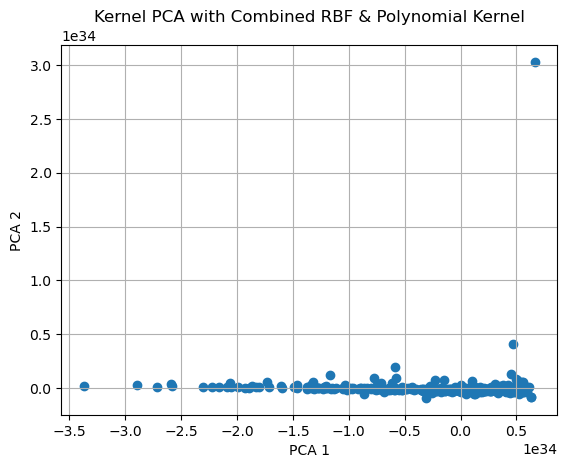

In [76]:
#RBF + Poly kernel
def kernel_pca_combined(data, poly_par, gamma, alpha=0.5, n_components=2):
    "Perform Kernel PCA using a half & half combination of RBF and Polynomial kernels."
    
    K_poly = kernel_matrix(data, 'poly', poly_par)
    K_rbf = kernel_matrix(data, 'rbf', gamma)

    # Combine kernels using a weighted sum
    K_combined = alpha * K_poly + (1 - alpha) * K_rbf

    # Center the combined kernel matrix
    K_combined = center_kernel_matrix(K_combined)

    eig_values, eig_vectors = np.linalg.eigh(K_combined)
    
    idx = np.argsort(eig_values)[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]

    selected_eig_vectors = eig_vectors[:, :n_components]

    # Project data
    X_pca = np.dot(K_combined, selected_eig_vectors)
    
    return X_pca


poly_par = {'degree': 3, 'coef0': 1}  
gamma = 2  
alpha = 0.5  #combining RBF and Polynomial kernel half & half
n_components = 2  # Reduce to 2 dimensions 

# Apply Kernel PCA with combined kernels
X_pca_combined = kernel_pca_combined(data, poly_par, gamma, alpha, n_components)
print(X_pca_combined.shape)
# Plot 
plt.scatter(X_pca_combined[:, 0], X_pca_combined[:, 1])
plt.title('Kernel PCA with Combined RBF & Polynomial Kernel')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()


In [77]:
# Load dataset
df = pd.read_csv("Thyloid.csv")  
X = df.iloc[:, :-1].values  # Features (exclude label)
y = df.iloc[:, -1].values   # Labels (last column)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Function for Combined Kernel PCA
def combined_kernel_pca(X_train, X_test, alpha=0.5, degree=3, coef0=1, gamma=0.5, n_components=10):
    """Applies a combined RBF + Polynomial Kernel PCA transformation."""
    kpca_poly = KernelPCA(n_components=n_components, kernel='poly', degree=degree, coef0=coef0)
    kpca_rbf = KernelPCA(n_components=n_components, kernel='rbf', gamma=gamma)

    # training data
    X_train_poly = kpca_poly.fit_transform(X_train)
    X_test_poly = kpca_poly.transform(X_test)

    X_train_rbf = kpca_rbf.fit_transform(X_train)
    X_test_rbf = kpca_rbf.transform(X_test)

    # Weighted combination
    X_train_pca = alpha * X_train_poly + (1 - alpha) * X_train_rbf
    X_test_pca = alpha * X_test_poly + (1 - alpha) * X_test_rbf

    return X_train_pca, X_test_pca

# Apply Kernel PCA 
X_train_pca, X_test_pca = combined_kernel_pca(X_train, X_test, alpha=0.5, n_components=10)

# Train a Naive Bayes 
NB = GaussianNB()
NB.fit(X_train_pca, y_train)

# Predictions
y_pred = NB.predict(X_test_pca)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Combined KPCA 1/2 & 1/2: {100*accuracy:}")




Accuracy with Combined KPCA 1/2 & 1/2: 24.347826086956523


In [80]:
# Part 3

In [57]:
#Covariance of the dataset & top 10 features with accuracy

# Extract 
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# covariance matrix
cov_matrix = np.cov(X, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, columns=df.columns[:-1], index=df.columns[:-1])
cov_abs_df = cov_df.abs()


top_cov = cov_abs_df.unstack().sort_values(ascending=False)
top_cov = top_cov[top_cov != 1]

# Get the top 10 
top_10_features = list(set(top_cov.head(10).index.get_level_values(0).tolist()))
X_top_10 = X[top_10_features]

X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

#Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict
y_pred = nb_classifier.predict(X_test)

# Accuracy**
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy with Naive Bayes: {accuracy * 100:}%")


Accuracy with Naive Bayes: 61.73913043478261%


In [88]:
# Distance between two points function
def dis (x1, x2):
    return np.linalg.norm(x1 - x2)
# minimum distance Classification function
def my_mdc(Train, Trainlabel, Test):
    pred = []
    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint,trainpoint))
        pred.append(Trainlabel[np.argmin(pred_dis)])
    return np.array(pred)
y_mdc = my_mdc(X_train_reduced_sklearn,y_train,X_test_reduced_sklearn)
print(100*accuracy_score(y_test,y_mdc))


36.52173913043478


In [ ]:
accu=[]
for i in range (50):
    pca = PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn = pca.transform(X_train)
    X_test_reduced_sklearn=pca.transform(X_test)
    y_mdc = my_mdc(X_train_reduced_sklearn,y_train,X_test_reduced_sklearn)
    Accuracy = 100*accuracy_score(y_test,y_mdc)
    accu.append(Accuracy)

In [ ]:
plt.plot(accu)
plt.ylim(0,100)
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()

In [134]:
# Build Bayes classifier 
class BayesClassifier:
    def __init__(self):
        self.classes = None
        self.priors = None
        self.mean = None
        self.variance = None

    def fit(self, X, y):
        """
        Train the Bayes classifier.

        Parameters:
        X: np.ndarray
            Feature matrix of shape (n_samples, n_features)
        y: np.ndarray
            Class labels of shape (n_samples,)
        """
        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)
        
        # Initialize arrays to store class-wise statistics
        self.mean = np.zeros((n_classes, n_features))
        self.variance = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, cls in enumerate(self.classes):
            X_c = X[y == cls]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.variance[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])
    
    def _calculate_likelihood(self, mean, var, x):
        """
        Calculate the Gaussian likelihood of the data.
        """
        eps = 1e-6  # Add small epsilon to variance to avoid division by zero
        coeff = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = -((x - mean) ** 2) / (2 * (var + eps))
        return coeff * np.exp(exponent)
    
    def _calculate_posterior(self, X):
        """
        Calculate posterior probability for each class.
        """
        posteriors = []
        for idx, cls in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(np.log(self._calculate_likelihood(self.mean[idx, :], self.variance[idx, :], X)), axis=1)
            posteriors.append(prior + likelihood)
        return np.array(posteriors).T

    def predict(self, X):
        """
        Predict class labels for the input data.
        """
        posteriors = self._calculate_posterior(X)
        return self.classes[np.argmax(posteriors, axis=1)]



In [132]:
# Apply Bayes Classifier on Whole data
B = BayesClassifier()
B.fit(X_train, y_train)
# Predict 
y_pred = B.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy (Bayes Classifier  with Whole data): {100*accuracy:.4f}')

Accuracy (Bayes Classifier  with Whole data): 26.9565


/var/folders/nn/8mj616453yg4q70_np1n86c80000gn/T/ipykernel_22187/1425049334.py:50: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._calculate_likelihood(self.mean[idx, :], self.variance[idx, :], X)), axis=1)


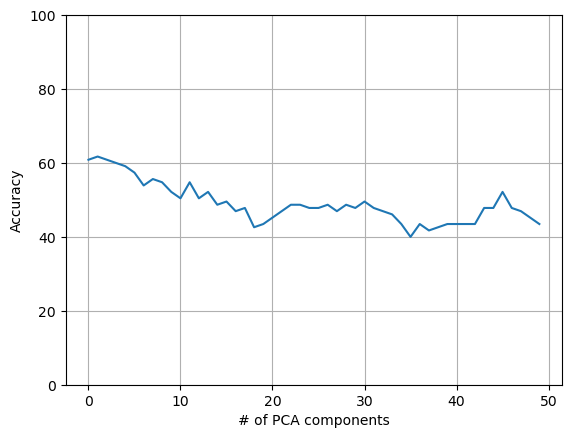

In [128]:
# PCA+ bayes Classifier
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train)
    X_test_reduced_sklearn=pca.transform(X_test)
    B = BayesClassifier()
    B.fit(X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred_Bayes = B.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_Bayes)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid() 

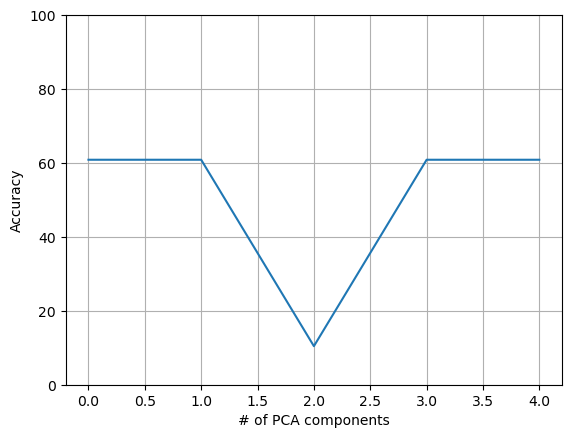

In [130]:
# KPCA + Bayes with rbf kernel
accu=[]
for i in range(5):
    kpca=KernelPCA(n_components=i+1, kernel = 'rbf')
    kpca.fit(X_train)
    X_train_reduced_sklearn=kpca.transform(X_train)
    X_test_reduced_sklearn=kpca.transform(X_test)
    B = BayesClassifier()
    B.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred = B.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

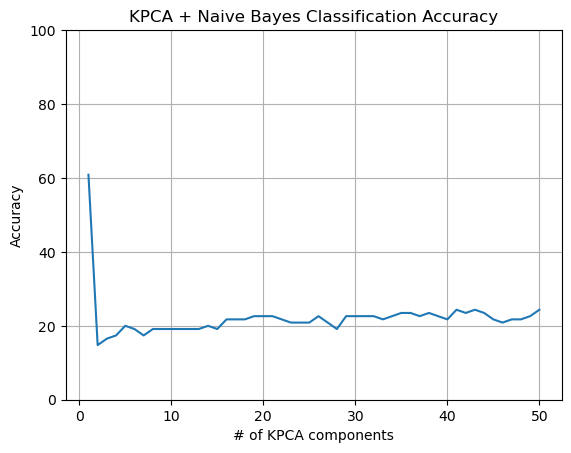

In [98]:
# KPCA + Bayes with poly kernel
accu = []
n_features = X_train.shape[1]
for i in range(1, min(51, n_features+1)):  
    # Kernel PCA with polynomial kernel
    kpca = KernelPCA(n_components=i, kernel='poly', degree=4)
    kpca.fit(X_train)
    X_train_reduced_sklearn = kpca.transform(X_train)
    X_test_reduced_sklearn = kpca.transform(X_test)

    # Apply Naive Bayes classifier
    B = GaussianNB()
    B.fit(X_train_reduced_sklearn, y_train)
    
    # Predict and evaluate
    y_pred = B.predict(X_test_reduced_sklearn)
    Accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(Accuracy)

# Plot
plt.plot(range(1, min(51, n_features+1)), accu)
plt.ylim(0, 100)
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy')
plt.grid()
plt.title('KPCA + Naive Bayes Classification Accuracy')
plt.show()


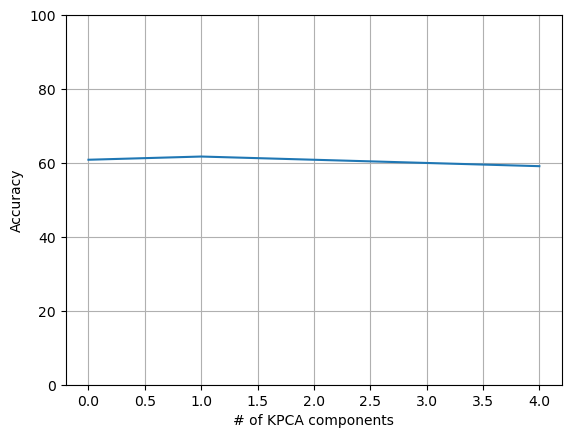

In [138]:
# KPCA + Bayes with linear kernel
accu = []

for i in range(1, 6):  
    # Apply Kernel PCA with linear kernel
    kpca = KernelPCA(n_components=i, kernel='linear')
    kpca.fit(X_train)
    
    # Transform  data
    X_train_reduced_sklearn = kpca.transform(X_train)
    X_test_reduced_sklearn = kpca.transform(X_test)
    
    # Apply Bayes classifier
    B = BayesClassifier()
    B.fit(X_train_reduced_sklearn, y_train)
    
    # Predict
    y_pred = B.predict(X_test_reduced_sklearn)
    Accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(Accuracy)

# Plot accuracy vs. number of KPCA components
plt.plot(accu)
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy')
plt.grid()



In [1]:
# Naive Bayes classifer on whole Data
NB= GaussianNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
print(100*accuracy_score(y_test,y_pred))

NameError: name 'GaussianNB' is not defined

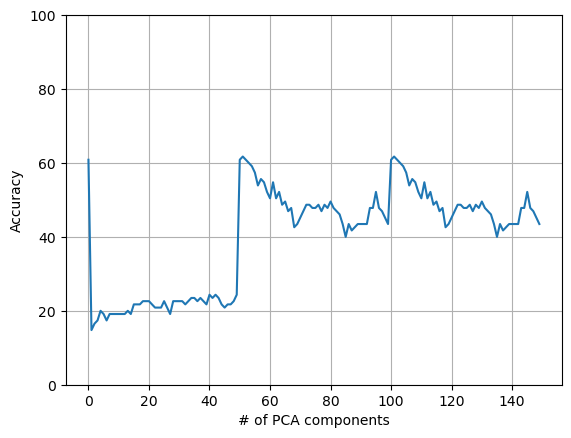

In [94]:
#Naive Bayes + PCA
n_features = X_train.shape[1]

# Loop 
for i in range(1, min(51, n_features+1)):  
    # Apply PCA to the data
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_reduced_sklearn = pca.transform(X_train)
    X_test_reduced_sklearn = pca.transform(X_test)

    # Apply Naive Bayes classifier
    NB = GaussianNB()
    NB.fit(X_train_reduced_sklearn, y_train)
    
    # Predict 
    y_pred_NB = NB.predict(X_test_reduced_sklearn)
    Accuracy = 100 * accuracy_score(y_test, y_pred_NB)
    accu.append(Accuracy)

# Plot
plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   


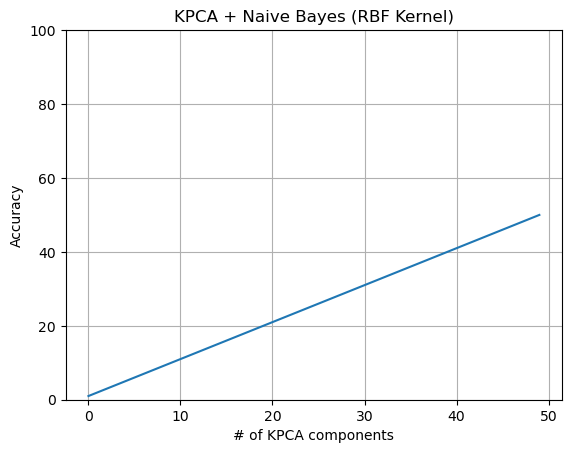

In [150]:
# KPCA + Naive Bayes with rbf kernel
accu = []

for i in range(1, 51): 
    # Apply KPCA with RBF 
    kpca = KernelPCA(n_components=i, kernel='rbf', gamma=1) 
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)

    # Apply Naive Bayes classifier
    NB = GaussianNB()
    NB.fit(X_train_reduced, y_train)

    # Predict 
    y_pred = NB.predict(X_test_reduced)
    accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(accuracy)

# Plot 
plt.plot(range(1, 51))
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy')
plt.title('KPCA + Naive Bayes (RBF Kernel)')
plt.grid()



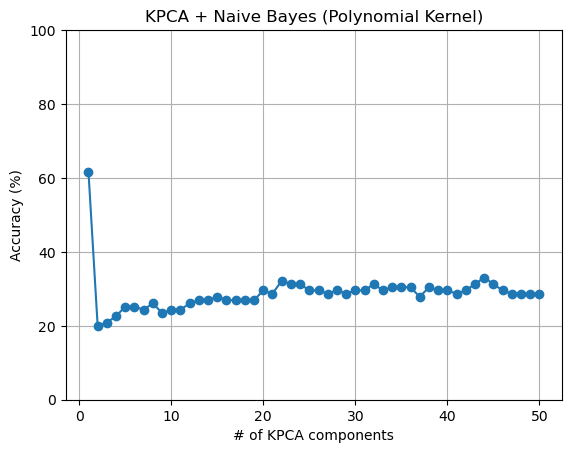

In [154]:
# KPCA + Naive Bayes with poly kernel
accu = []

for i in range(1, 51): 
    # Apply KPCA with Polynomial 
    kpca = KernelPCA(n_components=i, kernel='poly', degree=3, coef0=1, gamma=1)  
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)

    # Apply Naive Bayes 
    NB = GaussianNB()
    NB.fit(X_train_reduced, y_train)

    # Predict 
    y_pred = NB.predict(X_test_reduced)
    accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(accuracy)

# Plot the accuracy vs number of components
plt.plot(range(1, 51), accu, marker='o', linestyle='-')
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy (%)')
plt.title('KPCA + Naive Bayes (Polynomial Kernel)')
plt.grid()





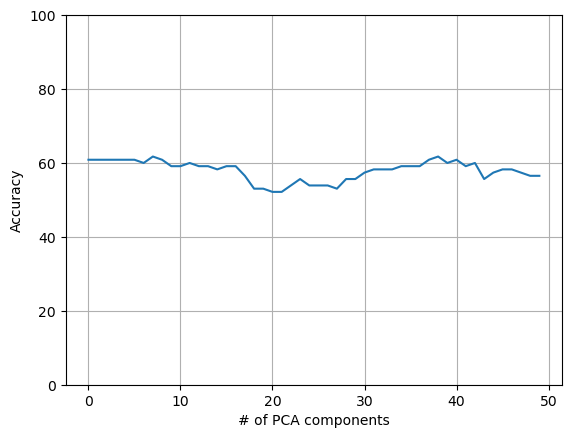

In [152]:
# KPCA + Naive Bayes with linear kernel
accu=[]
for i in range(50):
    kpca=KernelPCA(n_components=i+1, kernel = 'linear')
    kpca.fit(X_train)
    X_train_reduced_sklearn=kpca.transform(X_train)
    X_test_reduced_sklearn=kpca.transform(X_test)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred = LDA.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   

In [100]:
# KNN classifier on whole Data
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5130434782608696


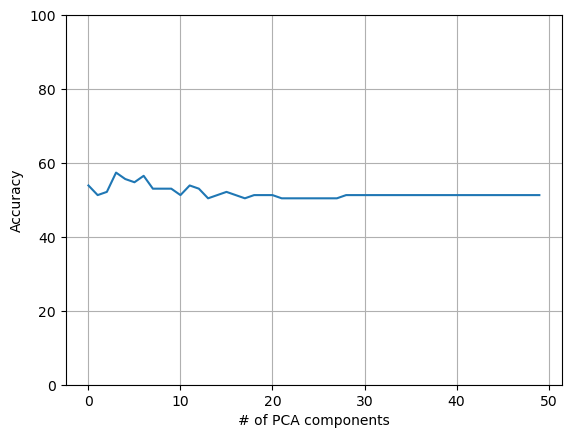

In [104]:
# KNN + PCA
n_features = X_train.shape[1]
accu = [] 
for i in range(1, min(51, n_features+1)):  
    # Apply PCA to the data
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_reduced_sklearn = pca.transform(X_train)
    X_test_reduced_sklearn = pca.transform(X_test)

    # Apply KNN classifier
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(X_train_reduced_sklearn, y_train)  # Use reduced training data

    # Predict 
    y_pred_KNN = KNN.predict(X_test_reduced_sklearn)  # Use reduced test data
    Accuracy = 100 * accuracy_score(y_test, y_pred_KNN)
    accu.append(Accuracy)

# Plot accuracy vs. number of PCA components
plt.plot(accu)
plt.ylim((0, 100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()


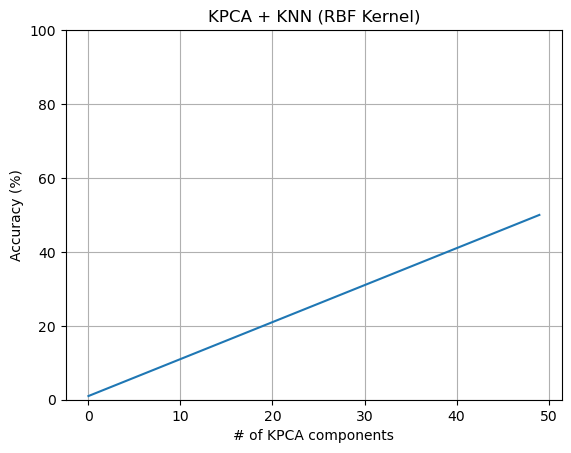

In [158]:
# KPCA + KNN with rbf kernel
accu = []

for i in range(1, 51): 
    # Apply KPCA with RBF Kernel
    kpca = KernelPCA(n_components=i, kernel='rbf', gamma=1)  
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)

    # Apply KNN classifier on reduced data
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(X_train_reduced, y_train)

    # Predict 
    y_pred = KNN.predict(X_test_reduced)
    accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(accuracy)

# Plot the accuracy vs number of components
plt.plot(range(1, 51))
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy (%)')
plt.title('KPCA + KNN (RBF Kernel)')
plt.grid()




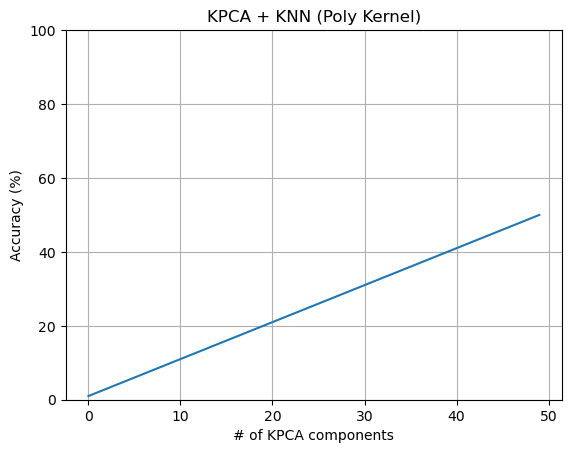

In [162]:
# KPCA + KNN with poly kernel
accu = []

for i in range(1, 51): 
    # Apply KPCA with Polynomial 
    kpca = KernelPCA(n_components=i, kernel='poly', degree=3, coef0=1, gamma=1)  
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)

    # Apply KNN classifier on reduced data
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(X_train_reduced, y_train)

    # Predict 
    y_pred = KNN.predict(X_test_reduced)
    accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(accuracy)

# Plot
plt.plot(range(1, 51))
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy (%)')
plt.title('KPCA + KNN (Poly Kernel)')
plt.grid()




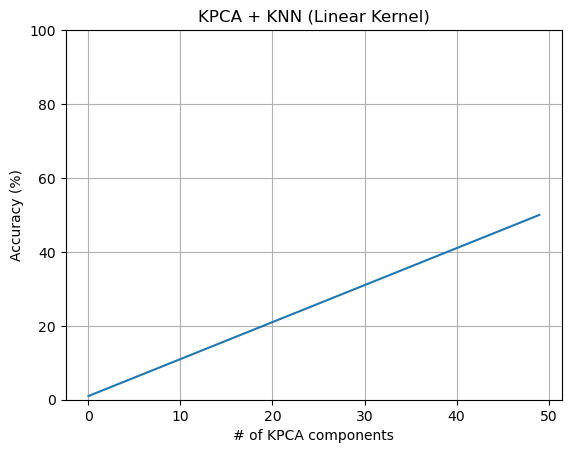

In [164]:
# KPCA + KNN with linear kernel
accu = []

for i in range(1, 51): 
    # Apply KPCA with Linear Kernel
    kpca = KernelPCA(n_components=i, kernel='linear')  
    X_train_reduced = kpca.fit_transform(X_train)
    X_test_reduced = kpca.transform(X_test)

    # Apply KNN classifier on reduced data
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(X_train_reduced, y_train)  

    # Predict 
    y_pred = KNN.predict(X_test_reduced)
    accuracy = 100 * accuracy_score(y_test, y_pred)
    accu.append(accuracy)

# Plot the accuracy vs number of components
plt.plot(range(1, 51))
plt.ylim((0, 100))
plt.xlabel('# of KPCA components')
plt.ylabel('Accuracy (%)')
plt.title('KPCA + KNN (Linear Kernel)')
plt.grid()


In [106]:
# LDA classifier on whole Data
LDA= LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred=LDA.predict(X_test)
print(100*accuracy_score(y_test,y_pred))

48.69565217391305


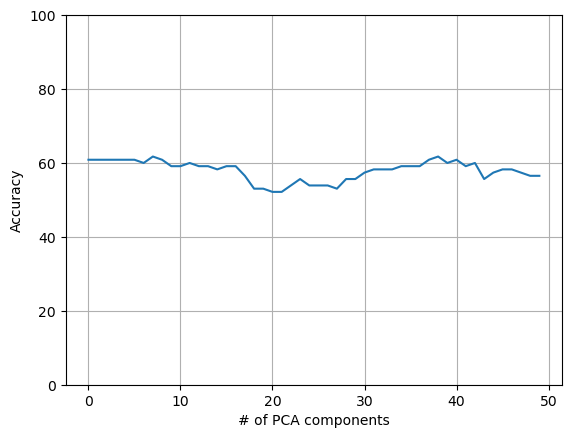

In [112]:
# LDA + PCA
n_features = X_train.shape[1]
accu = [] 

for i in range(1, min(51, n_features+1)):  
    # Apply PCA to the data
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_reduced_sklearn = pca.transform(X_train)
    X_test_reduced_sklearn = pca.transform(X_test)

    # Apply LDA classifier
    LDA = LinearDiscriminantAnalysis()
    LDA.fit(X_train_reduced_sklearn, y_train)  # Use reduced training data

    # Predict 
    y_pred_LDA = LDA.predict(X_test_reduced_sklearn)  # Use reduced test data
    Accuracy = 100 * accuracy_score(y_test, y_pred_LDA)
    accu.append(Accuracy)

# Plot accuracy vs. number of PCA components
plt.plot(accu)
plt.ylim((0, 100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()


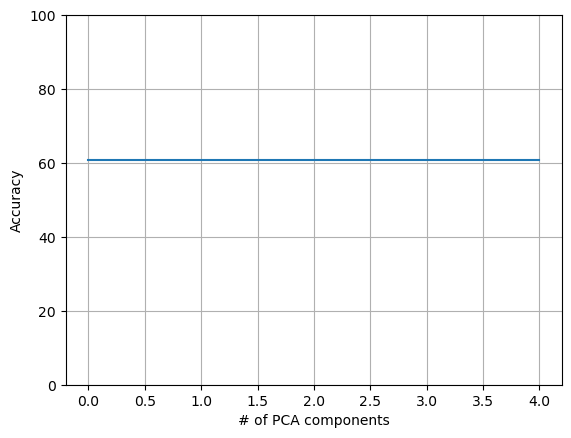

In [166]:
#KPCA + LDA with RBF kernel
accu=[]
for i in range(5):
    kpca=KernelPCA(n_components=i+1, kernel = 'rbf')
    kpca.fit(X_train)
    X_train_reduced_sklearn=kpca.transform(X_train)
    X_test_reduced_sklearn=kpca.transform(X_test)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred = LDA.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

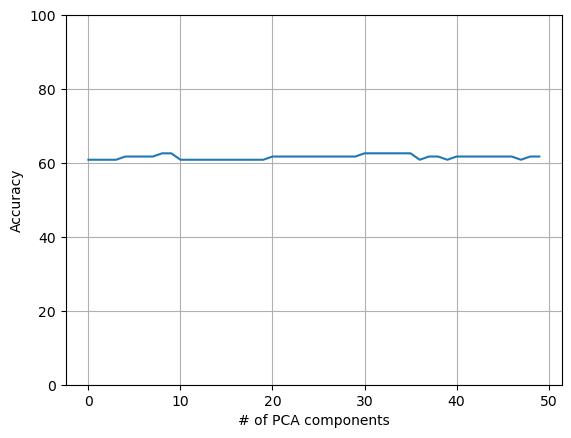

In [168]:
#KPCA + LDA with polynomial kernel
accu=[]
for i in range(50):
    kpca=KernelPCA(n_components=i+1, kernel = 'poly', degree=9)
    kpca.fit(X_train)
    X_train_reduced_sklearn=kpca.transform(X_train)
    X_test_reduced_sklearn=kpca.transform(X_test)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred = LDA.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

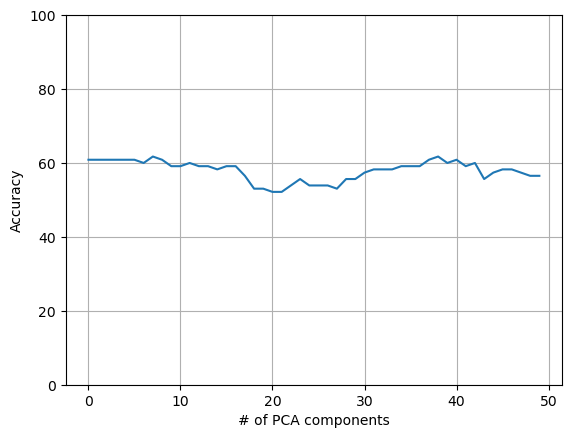

In [170]:
#KPCA + LDA with linear kernel
accu=[]
for i in range(50):
    kpca=KernelPCA(n_components=i+1, kernel = 'linear')
    kpca.fit(X_train)
    X_train_reduced_sklearn=kpca.transform(X_train)
    X_test_reduced_sklearn=kpca.transform(X_test)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred = LDA.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

In [191]:
# Build KDA classifier 
class KernelDiscriminantAnalysis:
    def __init__(self, kernel='linear', degree=3, coef0=1, gamma=None, reg=1e-3):
        """
        Kernel Discriminant Analysis (KDA) Classifier with Linear, RBF, and Polynomial Kernels.

        Parameters:
        - kernel: Kernel type ('linear', 'rbf', or 'poly')
        - degree: Degree for polynomial kernel
        - coef0: Coefficient for polynomial kernel
        - gamma: Parameter for RBF kernel (default: 1/n_features)
        - reg: Regularization term to prevent singular matrix issues
        """
        self.kernel = kernel
        self.degree = degree
        self.coef0 = coef0
        self.gamma = gamma
        self.reg = reg
        self.eigenvectors = None
        self.class_means = None
        self.X_train = None
        self.y_train = None
        self.label_dict = {}

    def compute_kernel(self, X, Y=None):
        """Computes the kernel matrix."""
        if self.kernel == 'rbf':
            return rbf_kernel(X, Y, gamma=self.gamma)
        elif self.kernel == 'poly':
            return polynomial_kernel(X, Y, degree=self.degree, coef0=self.coef0)
        elif self.kernel == 'linear':
            return linear_kernel(X, Y)
        else:
            raise ValueError("Unsupported kernel. Choose from 'rbf', 'poly', or 'linear'.")

    def encode_labels(self, y):
        """Encodes categorical labels into numerical values manually."""
        unique_classes = np.unique(y)
        self.label_dict = {label: idx for idx, label in enumerate(unique_classes)}
        return np.array([self.label_dict[label] for label in y])

    def fit(self, X, y):
        """Fits the KDA model and computes the discriminant space."""
        self.X_train = X
        self.y_train = self.encode_labels(y)

        n_samples = X.shape[0]
        K = self.compute_kernel(X)

        classes = np.unique(self.y_train)
        N_c, K_c, mean_c = {}, {}, {}

        # Compute class-wise kernel matrices
        for c in classes:
            idx = np.where(self.y_train == c)[0]
            K_c[c] = K[:, idx]
            N_c[c] = len(idx)
            mean_c[c] = np.mean(K_c[c], axis=1, keepdims=True)

        # Compute between-class scatter matrix M
        mean_total = np.mean(K, axis=1, keepdims=True)
        M = np.zeros((n_samples, n_samples))
        for c in classes:
            diff = mean_c[c] - mean_total
            M += N_c[c] * (diff @ diff.T)

        # Compute within-class scatter matrix N
        N = np.zeros((n_samples, n_samples))
        for c in classes:
            N += K_c[c] @ (np.eye(N_c[c]) - (1 / N_c[c]) * np.ones((N_c[c], N_c[c]))) @ K_c[c].T

        # Regularize N to ensure positive definiteness
        N += np.eye(N.shape[0]) * self.reg

        # Solve the generalized eigenvalue problem using np.linalg.solve()
        try:
            eigvals, eigvecs = np.linalg.eig(solve(N, M))  # Solve for eigenvectors
        except np.linalg.LinAlgError:
            print("Warning: N is singular, using pseudo-inverse instead.")
            eigvals, eigvecs = np.linalg.eig(pinv(N) @ M)

        # Select top discriminant directions
        idx = np.argsort(-eigvals)
        self.eigenvectors = eigvecs[:, idx[:len(classes) - 1]]

        # Normalize eigenvectors
        self.eigenvectors /= np.linalg.norm(self.eigenvectors, axis=0)

        # Compute class means in the transformed space
        self.class_means = {}
        transformed_X = self.transform(X)
        for c in classes:
            self.class_means[c] = np.mean(transformed_X[self.y_train == c], axis=0)

    def transform(self, X):
        """Projects data onto the discriminant space."""
        K_test = self.compute_kernel(X, self.X_train)
        return K_test @ self.eigenvectors

    def predict(self, X):
        """Predicts class labels based on the nearest class mean."""
        X_proj = self.transform(X)
        predictions = []
        for x in X_proj:
            # Assign to nearest class mean
            distances = {c: np.linalg.norm(x - self.class_means[c]) for c in self.class_means}
            predictions.append(min(distances, key=distances.get))
        return np.array(predictions)

# Generate synthetic dataset
def generate_data(n_samples=200, n_features=5, n_classes=3):
    """Generates a synthetic classification dataset using NumPy."""
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)

    # Generate labels
    y = np.random.choice(np.arange(n_classes), size=n_samples)
    return X, y


In [195]:
# Apply KDA as a classifier using the polynomial kernel
kda = KernelDiscriminantAnalysis(kernel='poly', degree=3, coef0=1, reg=1e-5)
kda.fit(X_train, y_train)

# Predict 
y_pred = kda.predict(X_test)
accuracy = np.mean(y_pred == y_test)  # Manual accuracy computation
print(f'Accuracy (KDA with Polynomial Kernel): {100*accuracy:}')


Accuracy (KDA with Polynomial Kernel): 25.217391304347824


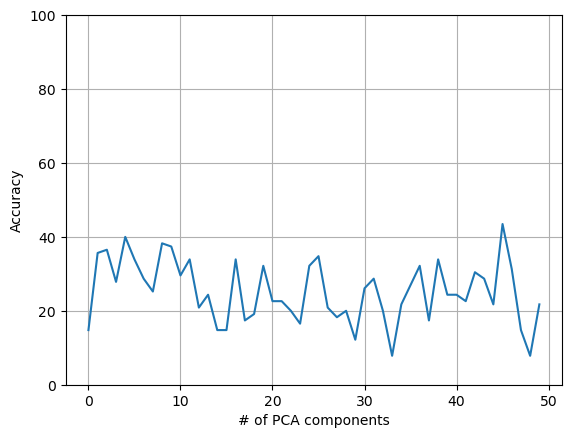

In [197]:
# PCA + KDA with Poly kernel
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train)
    X_test_reduced_sklearn=pca.transform(X_test)
    kda = KernelDiscriminantAnalysis(kernel='poly', degree=3, coef0=1, reg=1e-5)
    kda.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred_kda = kda.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_kda)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

In [199]:
# Apply KDA as a classifier using the linear kernel
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict 
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy (LDA with linear kernel): {100*accuracy_lda:}')


Accuracy (LDA with linear kernel): 48.69565217391305


In [207]:
# PCA + KDA with linear kernel
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train)
    X_test_reduced_sklearn=pca.transform(X_test)
    kda = KernelDiscriminantAnalysis(kernel='linear', reg=1e-5)
    kda.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred_kda = kda.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_kda)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [209]:
# PCA + KDA with rbf kernel
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train)
    X_test_reduced_sklearn=pca.transform(X_test)
    kda = KernelDiscriminantAnalysis(kernel='rbf',gamma=0.1, reg=1e-5)
    kda.fit( X_train_reduced_sklearn, y_train)
    # Predict and evaluate
    y_pred_kda = kda.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_kda)
    accu.append(Accuracy)

plt.plot(accu)
plt.ylim((0,100))
plt.xlabel('# of PCA components')
plt.ylabel('Accuracy')
plt.grid()   
 

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [ ]:
#Conclusion 

#From our findings we can see that KPCA is more effective in comparison to PCA. 
#Building the techniques from scratch provides a deeper understanding of how these techniques work
#However, the build in versions are much simpler to use and much more optimized.
#From this project we can see that kernels that are non linear provides the highest accuracy.
#The covariance matrix allowed us to better pick the top 10 features.